## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

In [28]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt

Data Set #1: Demographic Data

For my first data set I will import US demographic data via a CSV file.  This will allow me to analyze how US State Demographics have changed over time.

In [2]:
df = pd.read_csv('state_demographics.csv')
df.head()

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack
0,01. Alabama *,1993,4193114,0.734552,0.003784,0.006001,0.006747,0.255664
1,01. Alabama *,1995,4262731,0.732204,0.003632,0.006324,0.007751,0.257840
2,01. Alabama *,1996,4290403,0.731832,0.003608,0.006390,0.008365,0.258170
3,01. Alabama *,1997,4320281,0.730659,0.003527,0.006449,0.009106,0.259365
4,01. Alabama *,2000,4369862,0.729566,0.003341,0.003341,0.010378,0.260586


Right off the bat I don't like how my States are displayed.  Each State string leads with a number in addition to my index and many of the States have asteriscks on the end.  I will split these components to leave only the state name.

In [3]:
df.statefips=df.statefips.map(lambda x: x.split()[1])
df.head()

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack
0,Alabama,1993,4193114,0.734552,0.003784,0.006001,0.006747,0.255664
1,Alabama,1995,4262731,0.732204,0.003632,0.006324,0.007751,0.257840
2,Alabama,1996,4290403,0.731832,0.003608,0.006390,0.008365,0.258170
3,Alabama,1997,4320281,0.730659,0.003527,0.006449,0.009106,0.259365
4,Alabama,2000,4369862,0.729566,0.003341,0.003341,0.010378,0.260586


I would also prefer to see percentages for each group rather than decimals.  This can be easily fixed.

In [4]:
df['pctwhite']=df['pctwhite']*100
df['pctnatvieamerican']=df['pctnatvieamerican']*100
df['pctasian']=df['pctasian']*100
df['pcthisp']=df['pcthisp']*100
df['pctblack']=df['pctblack']*100
df.head()

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack
0,Alabama,1993,4193114,73.455167,0.378382,0.600079,0.674654,25.566369
1,Alabama,1995,4262731,73.220378,0.363194,0.632411,0.775137,25.784010
2,Alabama,1996,4290403,73.183197,0.360805,0.638984,0.836495,25.817016
3,Alabama,1997,4320281,73.065925,0.352709,0.644912,0.910589,25.936463
4,Alabama,2000,4369862,72.956586,0.334084,0.334084,1.037767,26.058626


It may be of particular interest to examine how the percentage minority has fluctuated over time.  I generate a new column by subtracting the percentage of the state that identifies as white from the whole.

In [5]:
df['pctnonwhite']=100-df['pctwhite']
df.head()

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack,pctnonwhite
0,Alabama,1993,4193114,73.455167,0.378382,0.600079,0.674654,25.566369,26.544833
1,Alabama,1995,4262731,73.220378,0.363194,0.632411,0.775137,25.784010,26.779622
2,Alabama,1996,4290403,73.183197,0.360805,0.638984,0.836495,25.817016,26.816803
3,Alabama,1997,4320281,73.065925,0.352709,0.644912,0.910589,25.936463,26.934075
4,Alabama,2000,4369862,72.956586,0.334084,0.334084,1.037767,26.058626,27.043414


Let's see what years we have to work with in our data.

In [63]:
df['year'].value_counts()

2012    51
2000    49
2002    48
1996    42
1997    37
2008    34
1995    33
1993    32
2006    30
2004    29
Name: year, dtype: int64

It seems that 2012 is the most recent (and most complete) set of demographic data.  Let's take a quick look at the year 2012 alone.

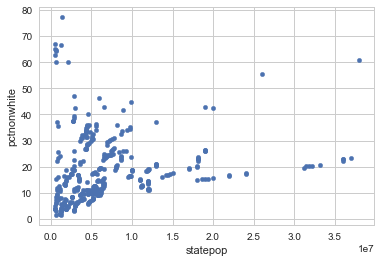

In [69]:
%matplotlib inline
df.plot.scatter(y='pctnonwhite',x='statepop')

To track how the minority population has changed over time I can create a column that measures percentage change from the previous period.  For purposes of interpretation it is important to note that time between census observations varies.

In [6]:
df['pctchange_minority']=df['pctnonwhite'].pct_change()
df['pctchange_minority']=df['pctchange_minority']*100
df.head(10)

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack,pctnonwhite,pctchange_minority
0,Alabama,1993,4193114,73.455167,0.378382,0.600079,0.674654,25.566369,26.544833,NaN
1,Alabama,1995,4262731,73.220378,0.363194,0.632411,0.775137,25.784010,26.779622,0.884500
2,Alabama,1996,4290403,73.183197,0.360805,0.638984,0.836495,25.817016,26.816803,0.138841
3,Alabama,1997,4320281,73.065925,0.352709,0.644912,0.910589,25.936463,26.934075,0.437308
4,Alabama,2000,4369862,72.956586,0.334084,0.334084,1.037767,26.058626,27.043414,0.405950
5,Alabama,2002,4500000,71.566248,0.973730,0.988340,1.692190,26.396981,28.433752,5.141133
6,Alabama,2004,4500000,71.404678,0.509800,0.812290,2.171830,26.365301,28.595322,0.568233
7,Alabama,2006,4600000,71.244609,0.517480,0.910650,2.476390,26.344320,28.755391,0.559773
8,Alabama,2008,4700000,71.027178,0.532510,0.955430,2.891740,26.379520,28.972822,0.756140
9,Alabama,2012,4800000,66.573262,0.548610,1.202460,4.065350,26.250911,33.426738,15.372738


This looks great!  I just need to reset the index.  I can also choose to drop rows missing an observation for pctchange_minority using query as long as I make sure that the interpretation for the entry in 1995 is percent change in the minority population since 1993.

In [7]:
df=df.query("pctchange_minority == pctchange_minority")
df=df.reset_index(drop=True)
df.head(10)

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack,pctnonwhite,pctchange_minority
0,Alabama,1995,4262731,73.220378,0.363194,0.632411,0.775137,25.784010,26.779622,0.884500
1,Alabama,1996,4290403,73.183197,0.360805,0.638984,0.836495,25.817016,26.816803,0.138841
2,Alabama,1997,4320281,73.065925,0.352709,0.644912,0.910589,25.936463,26.934075,0.437308
3,Alabama,2000,4369862,72.956586,0.334084,0.334084,1.037767,26.058626,27.043414,0.405950
4,Alabama,2002,4500000,71.566248,0.973730,0.988340,1.692190,26.396981,28.433752,5.141133
5,Alabama,2004,4500000,71.404678,0.509800,0.812290,2.171830,26.365301,28.595322,0.568233
6,Alabama,2006,4600000,71.244609,0.517480,0.910650,2.476390,26.344320,28.755391,0.559773
7,Alabama,2008,4700000,71.027178,0.532510,0.955430,2.891740,26.379520,28.972822,0.756140
8,Alabama,2012,4800000,66.573262,0.548610,1.202460,4.065350,26.250911,33.426738,15.372738
9,Alaska,2012,731449,63.054019,14.280690,5.570720,6.134260,3.402970,36.945981,10.528227


I'd like to reign in my decimal approximations a little bit.  I can do this with a round and then describe my data.

In [21]:
df=df.round(decimals=2)
df.head()

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack,pctnonwhite,pctchange_minority
0,Alabama,1995,4262731,73.22,0.36,0.63,0.78,25.78,26.78,0.88
1,Alabama,1996,4290403,73.18,0.36,0.64,0.84,25.82,26.82,0.14
2,Alabama,1997,4320281,73.07,0.35,0.64,0.91,25.94,26.93,0.44
3,Alabama,2000,4369862,72.96,0.33,0.33,1.04,26.06,27.04,0.41
4,Alabama,2002,4500000,71.57,0.97,0.99,1.69,26.40,28.43,5.14


In [70]:
df.describe().round(decimals=2)

,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack,pctnonwhite,pctchange_minority
count,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00
mean,2001.58,6772174.43,81.50,1.22,2.81,8.38,12.16,18.50,11.85
std,5.97,6625956.31,12.59,2.02,4.23,9.07,10.84,12.59,52.33
min,1993.00,469033.00,22.85,0.13,0.14,0.50,0.36,1.61,-96.25
25%,1996.00,2800000.00,75.89,0.29,1.10,2.37,3.74,9.71,0.76
50%,2000.00,5057142.00,83.90,0.53,1.82,5.02,9.41,16.10,2.16
75%,2006.00,8054178.00,90.29,1.16,3.32,10.61,16.37,24.11,8.41
max,2012.00,38000000.00,98.39,14.28,63.13,46.98,63.72,77.15,406.68


We can actually pull some interesting observations from this simple summary.  For example, the mean change in minority population is neary 12% while the median change is only about 2%.  This may mean that the minority population has rapidly grown in recent years compared to the early 90's or that the minority population has changed much more in some states than in others.  We can further investigate this using only the most recent subset of our data.

In [102]:
df[df['year']==2012].describe().round(2)

,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack,pctnonwhite,pctchange_minority
count,51.0,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,2012.0,6176789.59,70.08,1.53,3.83,11.00,10.98,29.92,83.38
std,0.0,6985434.55,16.13,2.82,5.36,10.01,10.80,16.13,68.96
min,2012.0,576412.00,22.85,0.14,0.70,1.32,0.52,5.86,7.55
25%,2012.0,1750000.00,59.06,0.24,1.39,4.58,3.21,18.13,31.76
50%,2012.0,4400000.00,73.94,0.43,2.41,8.70,7.33,26.06,61.10
75%,2012.0,6750000.00,81.87,1.01,4.06,12.68,14.96,40.94,111.20
max,2012.0,38000000.00,94.14,14.28,37.11,46.98,48.57,77.15,276.05


In [9]:
df.groupby('statefips')['pcthisp'].median()

statefips
Alabama           1.692190
Alaska            6.134260
Arizona          22.194554
Arkansas          2.105886
California       31.059140
Colorado         15.888433
Connecticut       8.630690
Delaware          7.294342
Florida          16.299805
Georgia           4.274833
Idaho             8.015410
Illinois         11.542799
Indiana           3.082247
Iowa              2.145735
Kansas            5.342602
Kentucky          1.526970
Louisiana         2.670936
Maine             0.732459
Maryland*         3.850930
Massachusetts     6.174691
Michigan          2.970373
Minesota          2.419875
Mississippi       1.054638
Missouri          1.672830
Montana           2.484368
Nebraska          4.090537
Nevada           19.787230
New              13.689664
North             2.061950
Ohio              1.707161
Oklahoma          4.465713
Oregon            7.319932
Pennsylvania      2.801780
Rhode             9.628280
South             1.861546
Tennessee         1.712826
Texas            3

Data Set #2: Airlines

For this data set I pulled airline arrival data from the R Studio library and saved it to a STATA file for easy upload.  Let's see what we can find.

In [10]:
air= pd.read_stata("airline_stat.dta")
air.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,19359.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,19359.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,19359.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,19359.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,19359.0


In [80]:
air.describe().round(decimals=2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,time_hour
count,336776.0,336776.00,336776.00,328521.00,336776.00,328521.00,328063.00,336776.00,327346.00,336776.00,327346.00,336776.00,336776.00,336776.00,336776.00
mean,2013.0,6.55,15.71,1349.11,1344.25,12.64,1502.05,1536.38,6.90,1971.92,150.69,1039.91,13.18,26.23,19541.66
std,0.0,3.41,8.77,488.28,467.34,40.21,533.26,497.46,44.63,1632.47,93.69,733.23,4.66,19.30,104.28
min,2013.0,1.00,1.00,1.00,106.00,-43.00,1.00,1.00,-86.00,1.00,20.00,17.00,1.00,0.00,19359.00
25%,2013.0,4.00,8.00,907.00,906.00,-5.00,1104.00,1124.00,-17.00,553.00,82.00,502.00,9.00,8.00,19452.00
50%,2013.0,7.00,16.00,1401.00,1359.00,-2.00,1535.00,1556.00,-5.00,1496.00,129.00,872.00,13.00,29.00,19542.00
75%,2013.0,10.00,23.00,1744.00,1729.00,11.00,1940.00,1945.00,14.00,3465.00,192.00,1389.00,17.00,44.00,19632.00
max,2013.0,12.00,31.00,2400.00,2359.00,1301.00,2400.00,2359.00,1272.00,8500.00,695.00,4983.00,23.00,59.00,19723.00


Let's sort these values from least arrival delay to greatest.  Here negative values represent early flights.

In [83]:
air=air.sort_values('arr_delay').reset_index(drop=True)
air.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,5,7,1715.0,1729,-14.0,1944.0,2110,-86.0,VX,193,N843VA,EWR,SFO,315.0,2565.0,17.0,29.0,19485.0
1,2013,5,20,719.0,735,-16.0,951.0,1110,-79.0,VX,11,N840VA,JFK,SFO,316.0,2586.0,7.0,35.0,19498.0
2,2013,5,6,1826.0,1830,-4.0,2045.0,2200,-75.0,AA,269,N3KCAA,JFK,SEA,289.0,2422.0,18.0,30.0,19484.0
3,2013,5,2,1947.0,1949,-2.0,2209.0,2324,-75.0,UA,612,N851UA,EWR,LAX,300.0,2454.0,19.0,49.0,19480.0
4,2013,5,4,1816.0,1820,-4.0,2017.0,2131,-74.0,AS,7,N551AS,EWR,SEA,281.0,2402.0,18.0,20.0,19482.0
5,2013,5,2,1926.0,1929,-3.0,2157.0,2310,-73.0,UA,1628,N24212,EWR,SFO,314.0,2565.0,19.0,29.0,19480.0
6,2013,5,13,657.0,700,-3.0,908.0,1019,-71.0,B6,671,N805JB,JFK,LAX,290.0,2475.0,7.0,0.0,19491.0
7,2013,5,7,2054.0,2055,-1.0,2317.0,28,-71.0,UA,622,N806UA,EWR,SFO,309.0,2565.0,20.0,55.0,19485.0
8,2013,5,6,1753.0,1755,-2.0,2004.0,2115,-71.0,DL,1394,N3760C,JFK,PDX,283.0,2454.0,17.0,55.0,19484.0
9,2013,5,3,616.0,630,-14.0,803.0,913,-70.0,US,195,N507AY,JFK,PHX,266.0,2153.0,6.0,30.0,19481.0


In [84]:
air.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NA,JFK,DCA,NaN,213.0,14.0,55.0,19631.0
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NA,LGA,SYR,NaN,198.0,22.0,0.0,19631.0
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764.0,12.0,10.0,19631.0
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419.0,11.0,59.0,19631.0
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431.0,8.0,40.0,19631.0


Some of the entries don't have an entry for arrival delay.  Let's drop these values.

In [85]:
air.query('arr_delay==arr_delay').tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
327341,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589.0,16.0,0.0,19561.0
327342,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586.0,18.0,45.0,19621.0
327343,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719.0,16.0,35.0,19368.0
327344,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483.0,19.0,35.0,19524.0
327345,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983.0,9.0,0.0,19367.0


That's more like it!  Now we can make this change permanent.  (We won't have to reset the index because all missing values were sorted to the bottom)

In [86]:
air=air.query('arr_delay==arr_delay')
air.tail(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
327336,2013,5,3,1133.0,2055,878.0,1250.0,2215,875.0,MQ,3744,N523MQ,EWR,ORD,112.0,719.0,20.0,55.0,19481.0
327337,2013,12,5,756.0,1700,896.0,1058.0,2020,878.0,AA,172,N5DMAA,EWR,MIA,149.0,1085.0,17.0,0.0,19697.0
327338,2013,7,22,2257.0,759,898.0,121.0,1026,895.0,DL,2047,N6716C,LGA,ATL,109.0,762.0,7.0,59.0,19561.0
327339,2013,3,17,2321.0,810,911.0,135.0,1020,915.0,DL,2119,N927DA,LGA,MSP,167.0,1020.0,8.0,10.0,19434.0
327340,2013,4,10,1100.0,1900,960.0,1342.0,2211,931.0,DL,2391,N959DL,JFK,TPA,139.0,1005.0,19.0,0.0,19458.0
327341,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589.0,16.0,0.0,19561.0
327342,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586.0,18.0,45.0,19621.0
327343,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719.0,16.0,35.0,19368.0
327344,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483.0,19.0,35.0,19524.0
327345,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983.0,9.0,0.0,19367.0


Now that we've got that sorted how we want, we can visualize our data.  Let's see how departure delays for flights are related to their arrival delays.

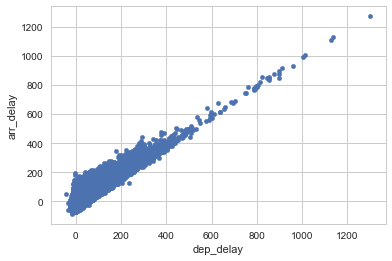

In [89]:
%matplotlib inline
air.plot.scatter(y='arr_delay',x='dep_delay')

As we would expect, flights with higher departure delays tend to arrive later to their destinations.  Let's try something else.

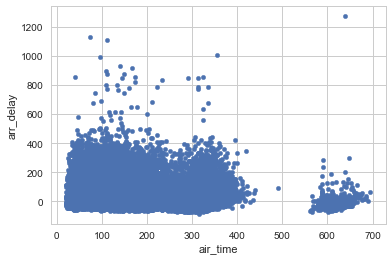

In [90]:
%matplotlib inline
air.plot.scatter(y='arr_delay',x='air_time')

Here we can observe that flights that spend a longer time in the air have lower variance in their arrival delay.  If the expected arrival for a flight is on average exactly its scheduled arrival time, we would expect 

Data Set #3: Military Bases

For a reserch position I just started in the Finance Department, Dr. Iverson asked me to find data on domestic military bases that can be converted into a workable dataset.  To my horror, none of the formats sent to me by the pentagon help desk were remotely familiar.  I will use python to convert the largest of these files from dbf format into a joined pandas data frame.

In [11]:
from simpledbf import Dbf5

In [42]:
base=Dbf5('MIRTA_Boundaries.dbf')
base=base.to_dataframe()
base.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Army Guard,Orchard Range TS Boise,N/A,Idaho,United States,Active
1,Army Guard,"Fort Pickett, ARNG MTC",N/A,Virginia,United States,Active
2,Army Guard,Camp Dodge Johnston TS,N/A,Iowa,United States,Active
3,Army Guard,NG TS Clark Natl Forest Wappapello,N/A,Missouri,United States,Active
4,Army Guard,CTC Fort Custer Trng Center,N/A,Michigan,United States,Active


This first data frame contains 846 observations and documents the name of the base, operation status, location, and corresponding branch of the military.  I will now load in the second set of military base data I have from the pentagon zip file.

In [13]:
base2=Dbf5('MIRTA_Points.dbf')
base2=base2.to_dataframe()
base2.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,AF Guard,Luis Munoz Marin IAP,N/A,Puerto Rico,Puerto Rico,Active
1,AF Guard,NAS JRB New Orleans,N/A,Louisiana,United States,Active
2,AF Guard,Gulfport-Biloxi Regional Airport (ANG),N/A,Mississippi,United States,Active
3,AF Guard,Jacksonville IAP,N/A,Florida,United States,Active
4,AF Guard,Tucson IAP,N/A,Arizona,United States,Active


This frame follows the same format as the first and adds another 846 observations.  From inspection of the data I believe at least some of these observations to be distinct from the boundaries file.  I will append this second frame onto the first to form one consolidated data set.

In [14]:
base = base.append(base2)
base.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Army Guard,Orchard Range TS Boise,N/A,Idaho,United States,Active
1,Army Guard,"Fort Pickett, ARNG MTC",N/A,Virginia,United States,Active
2,Army Guard,Camp Dodge Johnston TS,N/A,Iowa,United States,Active
3,Army Guard,NG TS Clark Natl Forest Wappapello,N/A,Missouri,United States,Active
4,Army Guard,CTC Fort Custer Trng Center,N/A,Michigan,United States,Active


I reset the index in the following cell to stop the count from restarting at 0 along the seam of the first and second base files.  I can check that this reindex worked properly using the tail command.

In [15]:
base=base.reset_index(drop=True)
base.tail()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
1591,AF Active,Los Angeles Air Force Annex No.4,N/A,California,United States,Active
1592,Army Active,Fort Wainwright,N/A,Alaska,United States,Active
1593,Army Active,Fort Stewart,N/A,Georgia,United States,Active
1594,Army Reserve,Fort Hunter Liggett,N/A,California,United States,Active
1595,Army Active,Fort Drum,N/A,New York,United States,Active


In [23]:
base.describe()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
count,1596,1596,1596,1596,1596,1596
unique,10,845,15,53,3,2
top,Navy Active,NAS JRB New Orleans,N/A,California,United States,Active
freq,474,3,1459,174,1524,1510


I want to verify that my data set contains strictly domestic files.  Using the value_counts operation I can see that my set contains only U.S. territories.

In [25]:
base['COUNTRY'].value_counts()

United States    1524
Guam               54
Puerto Rico        18
Name: COUNTRY, dtype: int64

I want to see proportion of each military component represented in my data set.  I can plot this visually using a bar chart.

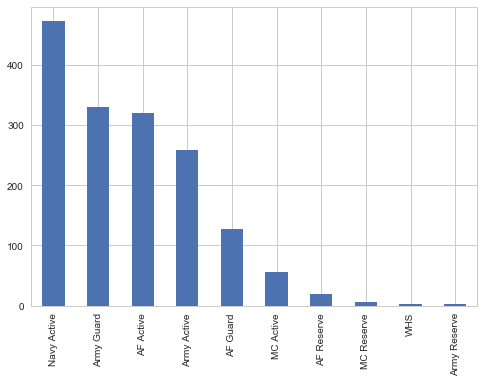

In [41]:
base['COMPONENT'].value_counts().plot(kind='bar')
plt.show()

After looking over the data tables again I decide that it may be convenient to have my data sorted alphabetically by state and territory I can arrange this easily using the sort_values command.

In [50]:
base=base.sort_values('STATE_TERR').reset_index(drop=True)
base.tail()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
1591,AF Active,F E Warren AFB,N/A,Wyoming,United States,Active
1592,AF Active,F E Warren AFB,N/A,Wyoming,United States,Active
1593,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
1594,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
1595,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active


Looking at this data frame in alphabetical order gives the added benefit of confirming my suspicion of duplicates in the data.  I confirm this by looking at more of the frame.

In [51]:
base

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,Army Active,Skelly Stagefield,N/A,Alabama,United States,Active
2,Army Guard,NG SMD,N/A,Alabama,United States,Active
3,Army Guard,Pelham Range Training Site - Fort McClellan,N/A,Alabama,United States,Active
4,Army Guard,NG R W Shepherd Hope Hull,N/A,Alabama,United States,Active
5,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
6,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
7,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
8,Navy Active,Barin Field,N/A,Alabama,United States,Active
9,Army Active,Shell Basefield,N/A,Alabama,United States,Active


Line 0 and line 13 are exactly the same and a cursory glance yields several more examples.  I decide to drop duplicates.  Before I save this change to the original data frame I can take a view of the frame to make sure it does what I want.  Sure enough, the duplicate NOLF Wolf base has been dropped.  I will resave the data frame and reset the index.

In [53]:
base.drop_duplicates().head(15)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,Army Active,Skelly Stagefield,N/A,Alabama,United States,Active
2,Army Guard,NG SMD,N/A,Alabama,United States,Active
3,Army Guard,Pelham Range Training Site - Fort McClellan,N/A,Alabama,United States,Active
4,Army Guard,NG R W Shepherd Hope Hull,N/A,Alabama,United States,Active
5,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
6,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
7,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
8,Navy Active,Barin Field,N/A,Alabama,United States,Active
9,Army Active,Shell Basefield,N/A,Alabama,United States,Active


In [54]:
base=base.drop_duplicates().reset_index(drop=True)
base.head(15)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,Army Active,Skelly Stagefield,N/A,Alabama,United States,Active
2,Army Guard,NG SMD,N/A,Alabama,United States,Active
3,Army Guard,Pelham Range Training Site - Fort McClellan,N/A,Alabama,United States,Active
4,Army Guard,NG R W Shepherd Hope Hull,N/A,Alabama,United States,Active
5,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
6,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
7,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
8,Navy Active,Barin Field,N/A,Alabama,United States,Active
9,Army Active,Shell Basefield,N/A,Alabama,United States,Active


When I take a tail  of the data frame I can see that the vast majority of the rows added from my second dbf file were duplicates (First data frame had 846 rows each with a unique Site Name).  

In [57]:
base.tail(10)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
840,Army Guard,CTC Camp Dawson-Kingwood,N/A,West Virginia,United States,Active
841,Army Guard,Williamstown,N/A,West Virginia,United States,Active
842,AF Guard,Volk ANGB,N/A,Wisconsin,United States,Active
843,Army Guard,Camp Williams Tomah MTA,N/A,Wisconsin,United States,Active
844,AF Guard,Gen Mitchell IAP,N/A,Wisconsin,United States,Active
845,AF Guard,Truax ANGB,N/A,Wisconsin,United States,Active
846,Army Active,Badger AAP,N/A,Wisconsin,United States,Inactive
847,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active
848,AF Active,F E Warren AFB,N/A,Wyoming,United States,Active
849,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active


Now that I have the data cleaned, sorted, and joined the way I want it I can save it to a csv file and send it to my boss for his convenience.

In [58]:
base.to_csv("base.csv") #saves cleaned data to same folder as notebook